In [1]:
from read_data import read_data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df, test_df, test_labels_df = read_data("data/")

# ignore test values with -1 labels
test_df_usable = test_df.loc[test_labels_df['toxic'] != -1]
test_labels_df_usable = test_labels_df.loc[test_labels_df['toxic'] != -1]

label_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [3]:
def visualize_labels(df, label_cols):
    # Melt the dataframe into long format
    label_df = df[label_cols].melt(var_name='label_type', value_name='value')

    # plot data
    ax = sns.displot(data=label_df, x='label_type', hue='value', multiple="dodge", shrink=0.8, palette='Set2')
    ax.set_xticklabels(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

def count_positive_labels(df, label_cols):
    new_df = pd.DataFrame()
    new_df['has_label'] = (df[label_cols].sum(axis=1) > 0).astype(int)
    print(new_df['has_label'].value_counts())

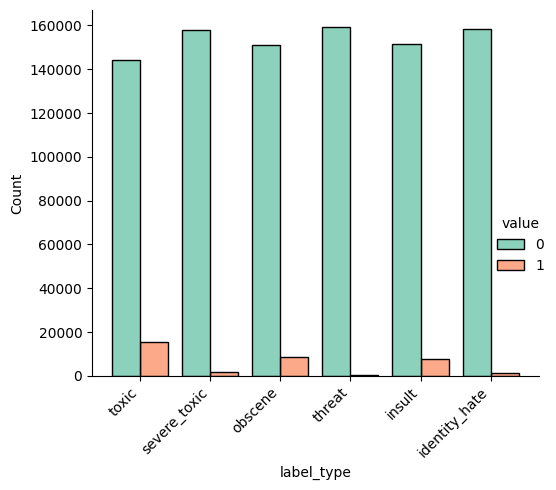

In [4]:
# plot the labels to visualize positive vs negative samples
visualize_labels(train_df, label_cols)

In [5]:
# check how many rows have at least one positive label
count_positive_labels(train_df, label_cols)
count_positive_labels(test_labels_df_usable, label_cols)

has_label
0    143346
1     16225
Name: count, dtype: int64
has_label
0    57735
1     6243
Name: count, dtype: int64


In [6]:
# establish train and test datasets
train_X = train_df['comment_text']
train_y = train_df[label_cols]
test_X = test_df_usable['comment_text']
test_y = test_labels_df_usable[label_cols]

next steps:
1. feature engineering: utilize TF-IDF to get an embedding for each data point
2. model development: build a Classifier Chain the runs Logistic Regression  
  2.1. pass down probabilities to later classifiers (e.g. high confidence in toxic could indicate severe_toxic)
3. benchmark: evaluate performance and tune parameters